# はじめてのニューラルネットワーク：分類問題の初歩

## 各種ライブラリのインポート

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## データセットのダウンロード

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## 識別するクラスのそれぞれの名前の定義

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## データ観察

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_images)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

## preprocessing

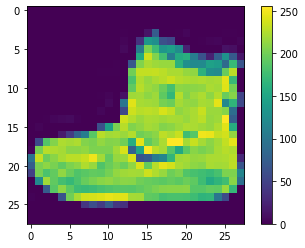

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images/255.0

test_images = test_images/255.0

<function matplotlib.pyplot.show(*args, **kw)>

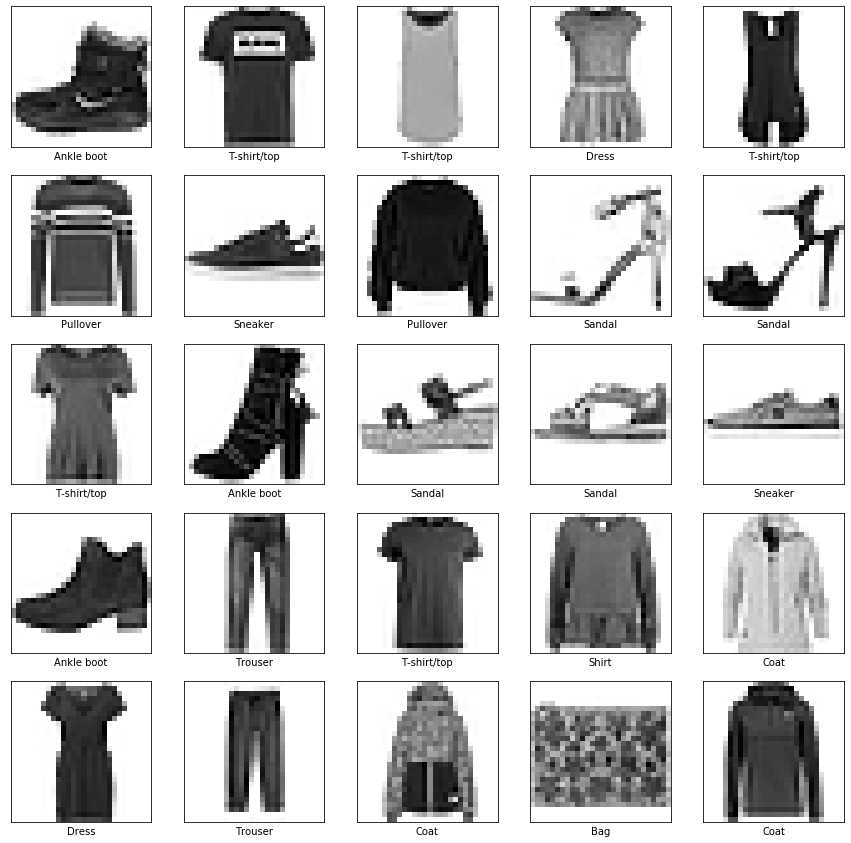

In [24]:
plt.figure(figsize = (15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [30]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=5, verbose=True)

Epoch 1/5
1875/1875 [==============================] - 2s 813us/step - loss: 0.5084 - accuracy: 0.8223
Epoch 2/5
1875/1875 [==============================] - 2s 849us/step - loss: 0.3764 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 2s 808us/step - loss: 0.3376 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 2s 807us/step - loss: 0.3141 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.2960 - accuracy: 0.8913


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=True)
print('\nTest accuracy:', test_acc)


313/313 [==============================] - 0s 574us/step - loss: 0.3521 - accuracy: 0.8709

Test accuracy: 0.8708999752998352


In [33]:
predictions = model.predict(test_images)

In [34]:
predictions[0]

array([2.51909933e-06, 1.03893775e-07, 2.80346467e-06, 4.00688492e-07,
       7.07015170e-06, 6.96508156e-04, 1.23061163e-05, 2.67085340e-02,
       1.79700255e-05, 9.72551763e-01], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [37]:
test_labels[0]

9

In [51]:
def plot_image(i, predictions_array, true_label,  img):
    """
    i : number of you want to plot image
    prediction_array : the number predict neuralnetwork about test_images
    true_label : the true label about test_image
    img : the test_image data
    """
    #ニューラルネットワークの出力と、正しいラベル、イメージデータそれぞれをi番目のものを取り出す
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)#プロット時のグリッドを非表示
    plt.xticks([])#x軸の目盛りが引数（この場合は何も出ない）
    plt.yticks([])#y軸の目盛りが引数（この場合は何も出ない）
    
    plt.imshow(img, cmap=plt.cm.binary)#画像の出力、白黒でのヒートマップになる
    #最大値のインデックス値をとり、分類されたクラスを獲得
    predicted_label = np.argmax(predictions_array)
    #ラベルが間違っている場合赤になり、あっている場合は青になる。
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim = ([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

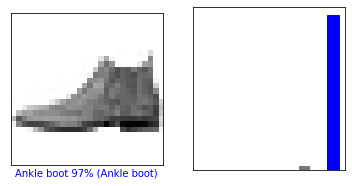

In [57]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

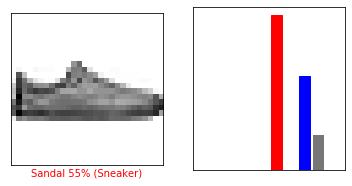

In [58]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()